# 1. Compréhension des données

## 1.1 Les bibliothèques

La première étape consiste à importer tous les bibliothèques nécessaires.

In [39]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

## 1.2 Définitions de quelques fonctions

In [40]:
# Fonction qui crée un diagramme histogramme 
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

# Fonction qui crée un diagramme de classes    
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

# Fonction que crée la matrice de correlation
def plot_correlation_map( df ):
    corr = data.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

# Fonction qui crée un diagramme qui represente l'importance de chaque variable
def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )

# Fonction qui crée un diagramme qui represente l'importance de chaque variable pour un modèle
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

## 1.3 Importation des données

On va utiliser la fonction read_csv de pandas et préciser ';' comme délimiteur.

In [41]:
data = pd.read_csv("cardio_train.csv/cardio_train.csv",delimiter=';')
# shape retourne un tuple qui représente les dimensions du data frame
print ('Datasets:' , 'data:' , data.shape)

Datasets: data: (70000, 13)


## 1.4 Statistiques et visualisations

In [42]:
# la fonction head retourne les 5 premiers enregistrements
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### 1.4.1 Statistiques

In [43]:
# La fonction describe retourne des informations importantes sur les atributs numériques tels que : la moyenne, la valeur minimale et maximale.
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### 1.4.2 La matrice de correlation

C'est une technique de réduction des variable prédictives

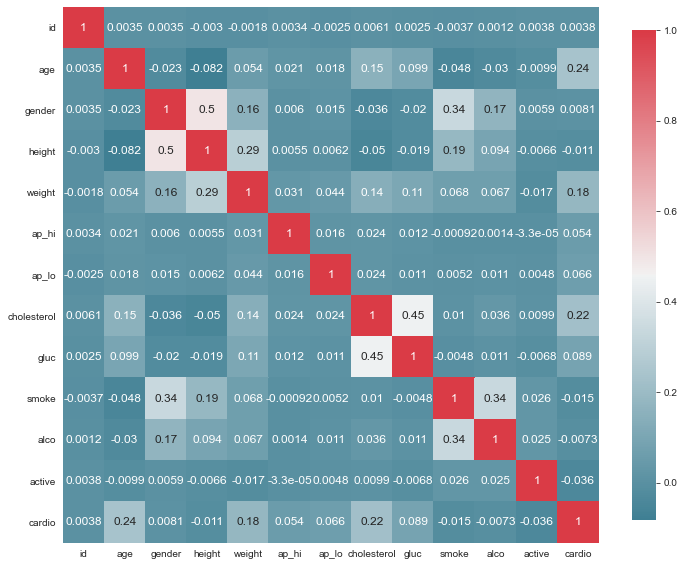

In [44]:
plot_correlation_map( data )

### 1.4.3 Exploration de la variable cible selon les autres variables

Le sexe des gens qui ont des maladies cardiaque

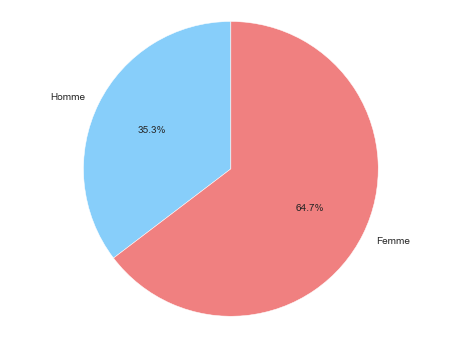

In [45]:
labels = 'Homme', 'Femme'
# female_is_cardio est l'ensemble d'enregistrements des femmes qui ont des maladies cardiaques
female_is_cardio = data[(data.gender == 1) & (data.cardio == 1)]
# male_is_cardio est l'ensemble d'enregistrements des hommes qui ont des maladies cardiaques
male_is_cardio = data[(data.gender==2) & (data.cardio==1)]
# les pourcentages
sizes = [len(male_is_cardio),len(female_is_cardio)]
# definition des couleurs de diagramme
colors = ['lightskyblue', 'lightcoral']
# création du diagramme
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.show()

Le taux de cholesterol et glucose des malades cardiaques

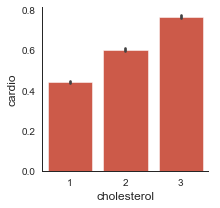

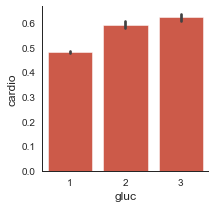

In [46]:
plot_categories( data , cat = 'cholesterol' , target = 'cardio' )
plot_categories( data , cat = 'gluc' , target = 'cardio' )

L'age des gens qui ont des maladies cardiaques

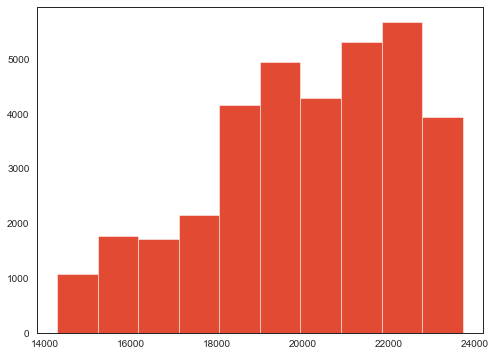

In [47]:
fig, ax = plt.subplots()
# extraction des enregistrements des personnes qui ont des maladies cardiaques
card=data[data.cardio==1]
# extraction de la colonnes d'age
ax.hist(card.age)
plt.show()

## 1.4.4 equilibrage du jeu de données

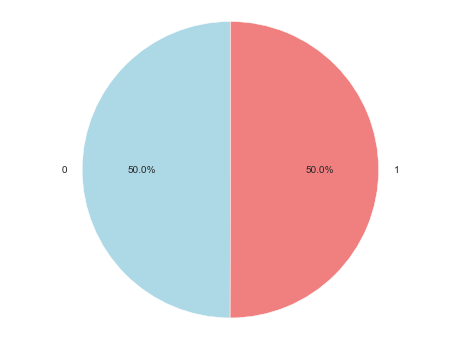

In [48]:
# exploration de la variable cible cardio
labels = '0', '1'
zero = data[data.cardio == 1]
one = data[data.cardio==0]
sizes = [len(zero),len(one)]

colors = ['lightblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.show()

# 2. Preparation des données

## 2.1 Valeurs manquantes

In [49]:
# Le nombre des valeurs nulles de chaque collonne
print(data.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


## 2.2 Valeurs erronnées

D'après les informations que nous a donné la fonction describe il apparait que la valeur minimale est anormale.

In [50]:
# l'enregistrement erroné
data[data.weight==10]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
57858,82567,18804,2,165,10.0,180,1100,2,2,0,0,1,1


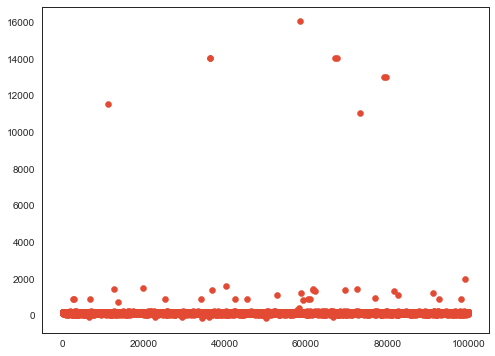

In [51]:
# Nuage de points de la variable ap_hi
plt.scatter(data.id,data.ap_hi)
plt.show()

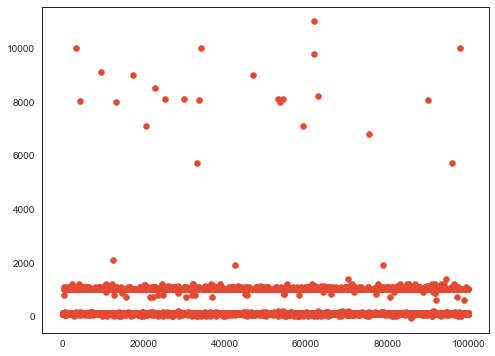

In [52]:
# Nuage de points de la variable ap_lo
plt.scatter(data.id,data.ap_lo)
plt.show()

## 2.3 Nettoyage des données
### 2.3.1 Valeur anormale de poids

On va remplacer cette valeur par la moyenne des poids

In [53]:
data.loc[data.id==82567,'weight']=data.weight.mean()
# verification des données
data[data.id==82567]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
57858,82567,18804,2,165,74.20569,180,1100,2,2,0,0,1,1


### 2.3.2 Valeurs anormales de ap_hi et ap_lo

On va supprimer les enregistrements qui contienent des valeurs anormales.

In [54]:
data.drop(data.loc[data['ap_hi']>8000].index, inplace=True)
data.drop(data.loc[data['ap_lo']>2000].index, inplace=True)
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69966.000000,69966.000000,69966.000000,69966.000000,69966.000000,69966.000000,69966.000000,69966.000000,69966.000000,69966.000000,69966.000000,69966.000000,69966.000000
mean,49974.100163,19469.001143,1.349527,164.357974,74.207008,127.108867,93.783738,1.366907,1.226424,0.088143,0.053755,0.803733,0.499657
std,28852.056580,2467.426418,0.476824,8.209866,14.394833,28.278689,108.322281,0.680298,0.572244,0.283505,0.225535,0.397175,0.500003
min,0.000000,10798.000000,1.000000,55.000000,11.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25007.250000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74891.750000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,2000.000000,1900.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### 2.4 Selection des variables

J'ai choisi d'intégrer tous les variables dans le modèle sauf le height puisqu'il y a une grande dépendance entre cette variable et la variable gender.

In [55]:
full_data = pd.concat( [ data.age , data.gender , data.weight , data.ap_hi, data.ap_lo, data.cholesterol, data.gluc, data.smoke, data.alco, data.active] , axis=1 )
full_data.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,62.0,110,80,1,1,0,0,1
1,20228,1,85.0,140,90,3,1,0,0,1
2,18857,1,64.0,130,70,3,1,0,0,0
3,17623,2,82.0,150,100,1,1,0,0,1
4,17474,1,56.0,100,60,1,1,0,0,0


Sélection des données d'apprentissage(70%) et de validation(30%). 

In [56]:
# les données d'apprentissage
train_data = full_data[ 0:48976]
train_data_ = data[ 0:48976].cardio
# les données de validation
validation_data = full_data[48976: ]
validation_data_ = data[48976: ].cardio

### 3.4.3 Les variables importantes pour la validation

0.9985911466840902


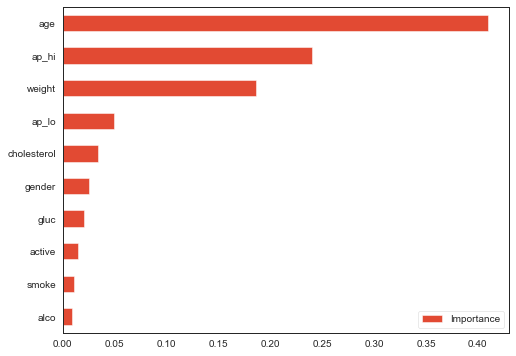

In [57]:
plot_variable_importance(train_data, train_data_)

# 3. Modélisation

## 3.1 Sélection des techniques de modélisation

C'est un problème de classification supervisé. Donc on va choisir ces modèle :

### 3.1.1 Random Forests Model

In [58]:
modelRFC = RandomForestClassifier(n_estimators=200)

### 3.1.2 Support Vector Machines


In [59]:
modelSVC = SVC()

### 3.1.3 Gradient Boosting Classifier

In [60]:
modelGBC = GradientBoostingClassifier()

### 3.1.4 K-nearest neighbors

In [61]:
modelKNC = KNeighborsClassifier(n_neighbors = 8)

### 3.1.5 Gaussian Naive Bayes

In [62]:
modelGNB = GaussianNB()

### 3.1.6 Logistic Regression

In [63]:
modelLR = LogisticRegression()

### 3.1.7 XGBoost

In [64]:
modelXGBoost = XGBClassifier()

## 3.2 Construire le modèle

### 3.2.1 Random Forests Model

In [65]:
modelRFC.fit( train_data , train_data_ )

RandomForestClassifier(n_estimators=200)

### 3.2.2 Support Vector Machines

In [66]:
modelSVC.fit( train_data , train_data_ )

SVC()

### 3.2.3 Gradient Boosting Classifier

In [67]:
modelGBC.fit( train_data , train_data_ )

GradientBoostingClassifier()

### 3.2.4 K-nearest neighbors

In [68]:
modelKNC.fit( train_data , train_data_ )

KNeighborsClassifier(n_neighbors=8)

### 3.2.5 Gaussian Naive Bayes

In [69]:
modelGNB.fit( train_data , train_data_ )

GaussianNB()

### 3.2.6 Logistic Regression

In [70]:
modelLR.fit( train_data , train_data_ )

LogisticRegression()

### 3.2.5 XGBoost

In [71]:
modelXGBoost.fit(train_data, train_data_)

[16:13:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## 4. Evaluation

## 4.1 Calcul de l'accuracy des modèles

In [72]:
# Score the model
evaluation={}
# RFC
evaluation["RFC"]=[modelRFC.score( train_data , train_data_ ) , modelRFC.score( validation_data , validation_data_ )]
print("Random Forest Classifier :")
print (evaluation["RFC"])

#SVC
evaluation["SVC"] = [modelSVC.score( train_data , train_data_ ) , modelSVC.score( validation_data , validation_data_ )]
print("\nSVC :")
print (evaluation["SVC"])

#Gradient Boosting Classifier
evaluation["GBC"] = [modelGBC.score( train_data , train_data_ ) , modelGBC.score( validation_data , validation_data_ )]
print("\nGradient Boosting Classifier :")
print (evaluation["GBC"])

# K-nearest neighbors
evaluation["KNC"] = [modelKNC.score( train_data , train_data_ ) , modelKNC.score( validation_data , validation_data_ )]
print("\nK-nearest neighbors :")
print (evaluation["KNC"])

#Gaussian Naive Bayes
evaluation["GNB"] = [modelGNB.score( train_data , train_data_ ) , modelGNB.score( validation_data , validation_data_ )]
print("\nGaussian Naive Bayes :")
print (evaluation["GNB"])

#Logistic Regression
evaluation["LR"] = [modelLR.score( train_data , train_data_ ) , modelLR.score( validation_data , validation_data_ )]
print("\nLogistic Regression :")
print (evaluation["LR"])

#XGBoost
evaluation["xgboost"] = [modelXGBoost.score( train_data , train_data_ ) , modelXGBoost.score( validation_data , validation_data_ )]
print("\nxgboost")
print (evaluation["xgboost"])

Random Forest Classifier :
[0.9985911466840902, 0.695378751786565]

SVC :
[0.6038467820973538, 0.6034302048594569]

Gradient Boosting Classifier :
[0.7393008820646847, 0.7356836588851834]

K-nearest neighbors :
[0.7529606337798105, 0.6945212005717009]

Gaussian Naive Bayes :
[0.6169960797125122, 0.6164363982848976]

Logistic Regression :
[0.6409670042469782, 0.6340638399237732]

xgboost
[0.7634555700751389, 0.7316341114816579]


## 4.2 Comparaidon des modèles

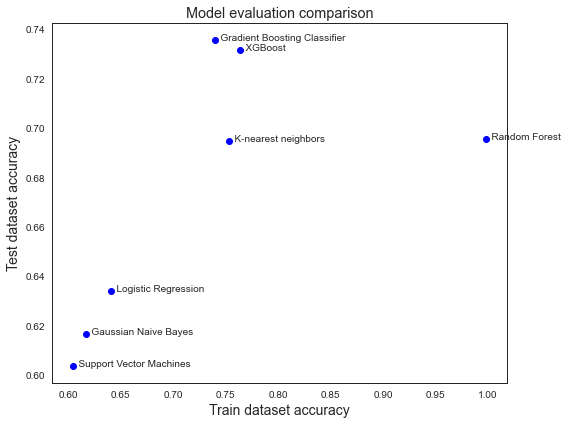

In [73]:
# Plot example with list format
X=[]
Y=[]
# les noms des algorithmes
l=['  Random Forest','  Support Vector Machines','  Gradient Boosting Classifier','  K-nearest neighbors','  Gaussian Naive Bayes','  Logistic Regression','  XGBoost']
k=0
for i in evaluation.keys():
    X.append(evaluation[i][0])
    Y.append(evaluation[i][1])
    plt.annotate(l[k],(evaluation[i][0],evaluation[i][1]))
    k=k+1
    
plt.plot(X, Y,'bo') # bo : les bulles bleu
plt.title('Model evaluation comparison')
plt.xlabel('Train dataset accuracy', fontsize=14)
plt.ylabel('Test dataset accuracy', fontsize=14)
plt.tight_layout()
plt.show()

## 4.3 Importance des variables dans le modèle

On va voir l'importance de chaque variable pour le modèle Gradiant Boosting Classifier

0.7393008820646847


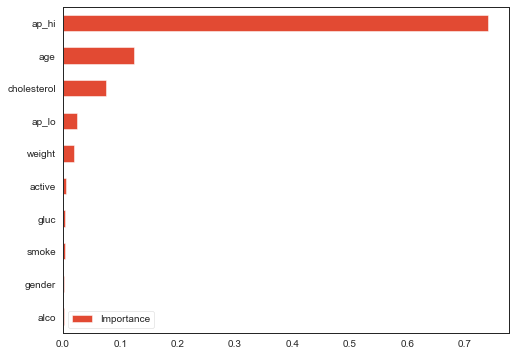

In [74]:
plot_model_var_imp(modelGBC, train_data, train_data_)

# 5. Déploiement


In [75]:
# exécuter le modéle
train_data_ = modelGBC.predict( train_data )
person_id = data[:48976].id
test = pd.DataFrame( { 'personId': person_id , 'cardio': train_data_ } )
test.shape
test.head()
#enregistrement des resultats dans un fichier csv
test.to_csv( 'cardio_pred.csv', index = False)